# Data Preparation

### Meter A
Contains 87 instances of physical diagnostic parameters for an 8-path liquid USM. It
has 37 attributes(features) and 2 classes or health states: \
(1) -- Flatness ratio \
(2) -- Symmetry \
(3) -- Crossflow \
(4)-(11) -- Flow velocity in each of the eight paths \
(12)-(19) -- Speed of sound in each of the eight paths \
(20) -- Average speed of sound in all eight paths \
(21)-(36) -- Gain at both ends of each of the eight paths \
(37) -- Class attribute or health state of meter: 1,2 \
Class '1' - Healthy \
Class '2' - Installation effects 

#### Loading Datasets

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
meter_a_df = pd.read_csv("./dataset/Meter A", sep="\t", header=None)
meter_a_headers = ['Flatness Ratio',
                      'Symmetry',
                      'Crossflow',
                      'Flow Velocity 1',
                      'Flow Velocity 2',
                      'Flow Velocity 3',
                      'Flow Velocity 4',
                      'Flow Velocity 5',
                      'Flow Velocity 6',
                      'Flow Velocity 7',
                      'Flow Velocity 8',
                      'Speed of Sound 1',
                      'Speed of Sound 2',
                      'Speed of Sound 3',
                      'Speed of Sound 4',
                      'Speed of Sound 5',
                      'Speed of Sound 6',
                      'Speed of Sound 7',
                      'Speed of Sound 8',
                      'Average Speed of Sound',
                      'Gain at both ends 1',
                      'Gain at both ends 2',
                      'Gain at both ends 3',
                      'Gain at both ends 4',
                      'Gain at both ends 5',
                      'Gain at both ends 6',
                      'Gain at both ends 7',
                      'Gain at both ends 8',
                      'Gain at both ends 9',
                      'Gain at both ends 10',
                      'Gain at both ends 11',
                      'Gain at both ends 12',
                      'Gain at both ends 13',
                      'Gain at both ends 14',
                      'Gain at both ends 15',
                      'Gain at both ends 16',
                      'Class Attribute/Health State']
meter_a_df.columns = meter_a_headers
meter_a_df.loc[meter_a_df['Class Attribute/Health State'] == 2, 'Class Attribute/Health State'] = 3         # change label 2 to 3, for common class label across all datasets
meter_a_df_x = meter_a_df.drop(['Class Attribute/Health State'], axis=1, inplace=False)
meter_a_df_y = meter_a_df[['Class Attribute/Health State']].copy()

meter_b_df = pd.read_csv("./dataset/Meter B", sep="\t", header=None)
meter_b_headers = [
    'Profile Factor',
    'Symmetry',
    'Crossflow',
    'Swirl Angle',
    'Flow Velocity 1',
    'Flow Velocity 2',
    'Flow Velocity 3',
    'Flow Velocity 4',
    'Average flow velocity in all four paths',
    'Speed of Sound 1',
    'Speed of Sound 2',
    'Speed of Sound 3',
    'Speed of Sound 4',
    'Average Speed of Sound',
    'Signal Strength 1',
    'Signal Strength 2',
    'Signal Strength 3',
    'Signal Strength 4',
    'Signal Strength 5',
    'Signal Strength 6',
    'Signal Strength 7',
    'Signal Strength 8',
    'Turbulence 1',
    'Turbulence 2',
    'Turbulence 3',
    'Turbulence 4',
    'Meter Performance',
    'Signal Quality 1',
    'Signal Quality 2',
    'Signal Quality 3',
    'Signal Quality 4',
    'Signal Quality 5',
    'Signal Quality 6',
    'Signal Quality 7',
    'Signal Quality 8',
    'Gain at both ends 1',
    'Gain at both ends 2',
    'Gain at both ends 3',
    'Gain at both ends 4',
    'Gain at both ends 5',
    'Gain at both ends 6',
    'Gain at both ends 7',
    'Gain at both ends 8',
    'Transit Time 1',
    'Transit Time 2',
    'Transit Time 3',
    'Transit Time 4',
    'Transit Time 5',
    'Transit Time 6',
    'Transit Time 7',
    'Transit Time 8',
    'Class Attribute/Health State'
]
meter_b_df.columns = meter_b_headers
meter_a_df.loc[meter_a_df['Class Attribute/Health State'] == 3, 'Class Attribute/Health State'] = 4         # change label 3 to 4, for common class label across all datasets
meter_b_df_x = meter_b_df.drop(meter_b_df.columns[51], axis=1, inplace=False)
meter_b_df_y = meter_b_df[['Class Attribute/Health State']].copy()

meter_d_df = pd.read_csv("./dataset/Meter D", sep="\t", header=None)
meter_d_headers=[
    'Profile Factor',
    'Symmetry',
    'Crossflow',
    'Flow Velocity 1',
    'Flow Velocity 2',
    'Flow Velocity 3',
    'Flow Velocity 4',
    'Speed of Sound 1',
    'Speed of Sound 2',
    'Speed of Sound 3',
    'Speed of Sound 4',
    'Signal Strength 1',
    'Signal Strength 2',
    'Signal Strength 3',
    'Signal Strength 4',
    'Signal Strength 5',
    'Signal Strength 6',
    'Signal Strength 7',
    'Signal Strength 8',
    'Signal Quality 1',
    'Signal Quality 2',
    'Signal Quality 3',
    'Signal Quality 4',
    'Signal Quality 5',
    'Signal Quality 6',
    'Signal Quality 7',
    'Signal Quality 8',
    'Gain at both ends 1',
    'Gain at both ends 2',
    'Gain at both ends 3',
    'Gain at both ends 4',
    'Gain at both ends 5',
    'Gain at both ends 6',
    'Gain at both ends 7',
    'Gain at both ends 8',
    'Transit Time 1',
    'Transit Time 2',
    'Transit Time 3',
    'Transit Time 4',
    'Transit Time 5',
    'Transit Time 6',
    'Transit Time 7',
    'Transit Time 8',
    'Class Attribute/Health State'
]
meter_d_df.columns = meter_d_headers
meter_d_df_x = meter_d_df.drop(meter_d_df.columns[36], axis=1, inplace=False)
meter_d_df_y = meter_d_df[['Class Attribute/Health State']].copy()


In [54]:
print('Meter A class labels:', meter_a_df['Class Attribute/Health State'].unique(), 'Meter A size:', meter_a_df.shape)
print('Meter B class labels:', meter_b_df['Class Attribute/Health State'].unique(), 'Meter B size:', meter_b_df.shape)
print('Meter D class labels:', meter_d_df['Class Attribute/Health State'].unique(), 'Meter D size:', meter_d_df.shape)
meter_a_df

Meter A class labels: [1 4] Meter A size: (87, 37)
Meter B class labels: [1 2 3] Meter B size: (92, 52)
Meter D class labels: [1 2 3 4] Meter D size: (180, 44)


,Flatness Ratio,Symmetry,Crossflow,Flow Velocity 1,Flow Velocity 2,Flow Velocity 3,Flow Velocity 4,Flow Velocity 5,Flow Velocity 6,Flow Velocity 7,...,Gain at both ends 8,Gain at both ends 9,Gain at both ends 10,Gain at both ends 11,Gain at both ends 12,Gain at both ends 13,Gain at both ends 14,Gain at both ends 15,Gain at both ends 16,Class Attribute/Health State
0,0.841499,1.009367,0.993816,8.469805,10.278727,10.037759,8.501365,8.581726,10.247763,10.058822,...,32.451173,34.568685,33.082683,36.722005,36.969403,36.075847,36.051432,35.174155,32.729490,1
1,0.842250,1.006584,0.996605,7.531891,9.139924,8.951618,7.612213,7.623325,9.106345,8.945142,...,32.428385,34.441732,33.081055,36.687825,36.933595,36.054688,35.979818,34.847005,32.731122,1
2,0.840723,1.011647,0.998152,6.641699,7.975464,7.857692,6.593117,6.681572,7.964596,7.814698,...,32.428385,34.275715,33.113605,36.661785,36.873370,36.002605,35.963542,34.689128,32.771810,1
3,0.841119,1.017807,0.996812,5.687524,6.824334,6.689885,5.615428,5.763315,6.801051,6.686639,...,32.485350,34.080403,33.170573,36.673177,36.811525,35.974935,35.955403,34.500328,32.849935,1
4,0.840358,1.016534,0.996221,5.660385,6.829560,6.675628,5.623977,5.736818,6.813453,6.672377,...,32.503255,34.122720,33.164062,36.673177,36.826173,35.996095,35.968425,34.474283,32.853190,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,0.792929,1.006295,0.999666,2.696691,3.414048,3.389731,2.699618,2.715628,3.414042,3.393569,...,32.555338,33.767905,33.300782,36.640627,36.691080,35.849610,35.834960,33.823245,33.012697,4
83,0.792309,1.004472,0.999873,2.679006,3.433638,3.386612,2.714345,2.699840,3.429142,3.380373,...,32.545573,33.769532,33.294272,36.634115,36.692707,35.859377,35.844727,33.819987,33.022460,4
84,0.793471,1.009560,1.001110,2.691553,3.431745,3.364790,2.717383,2.700560,3.432876,3.374046,...,32.561848,33.780925,33.287762,36.635745,36.694335,35.854492,35.831705,33.824870,33.020832,4
85,0.796730,1.010570,0.999029,2.714849,3.412818,3.388927,2.692776,2.738119,3.413739,3.381779,...,32.555338,33.774415,33.302410,36.640627,36.699218,35.859377,35.849610,33.816732,33.011067,4


### Unionize datasets of Meter A, B, and D.
Union of all datasets, and filling up missing columns with NaN values for further processing later on.

In [55]:
# add different columns between Meter B and A, as well as D and A, into A
diff = meter_b_df.columns.difference(meter_a_df.columns)
print('Meter A missing columns from B:', diff.shape[0], diff.tolist())
a = np.full(shape=(meter_a_df.shape[0], diff.shape[0]), fill_value=np.nan)
a = pd.DataFrame(a, columns=diff.tolist())
meter_a_full_df = pd.concat([meter_a_df, a], axis=1)
diff = meter_d_df.columns.difference(meter_a_full_df.columns)
print('New Meter A missing columns from D:', diff.shape[0], diff.tolist())
a = np.full(shape=(meter_a_df.shape[0], diff.shape[0]), fill_value=np.nan)
a = pd.DataFrame(a, columns=diff.tolist())
meter_a_full_df = pd.concat([meter_a_full_df, a], axis=1)
meter_a_full_df.shape


Meter A missing columns from B: 32 ['Average flow velocity in all four paths', 'Meter Performance', 'Profile Factor', 'Signal Quality 1', 'Signal Quality 2', 'Signal Quality 3', 'Signal Quality 4', 'Signal Quality 5', 'Signal Quality 6', 'Signal Quality 7', 'Signal Quality 8', 'Signal Strength 1', 'Signal Strength 2', 'Signal Strength 3', 'Signal Strength 4', 'Signal Strength 5', 'Signal Strength 6', 'Signal Strength 7', 'Signal Strength 8', 'Swirl Angle', 'Transit Time 1', 'Transit Time 2', 'Transit Time 3', 'Transit Time 4', 'Transit Time 5', 'Transit Time 6', 'Transit Time 7', 'Transit Time 8', 'Turbulence 1', 'Turbulence 2', 'Turbulence 3', 'Turbulence 4']
New Meter A missing columns from D: 0 []


(87, 69)

In [56]:
# add different columns between Meter A and B, as well as D and B, into B
diff = meter_a_df.columns.difference(meter_b_df.columns)
print('Meter B missing columns from A:', diff.shape[0], diff.tolist())
# check for 
a = np.full(shape=(meter_b_df.shape[0], diff.shape[0]), fill_value=np.nan)
a = pd.DataFrame(a, columns=diff.tolist())
meter_b_full_df = pd.concat([meter_b_df, a], axis=1)
diff = meter_d_df.columns.difference(meter_b_full_df.columns)
print('New Meter B missing columns from D:', diff.shape[0], diff.tolist())
a = np.full(shape=(meter_b_df.shape[0], diff.shape[0]), fill_value=np.nan)
a = pd.DataFrame(a, columns=diff.tolist())
meter_b_full_df = pd.concat([meter_b_full_df, a], axis=1)
meter_b_full_df.shape


Meter B missing columns from A: 17 ['Flatness Ratio', 'Flow Velocity 5', 'Flow Velocity 6', 'Flow Velocity 7', 'Flow Velocity 8', 'Gain at both ends 10', 'Gain at both ends 11', 'Gain at both ends 12', 'Gain at both ends 13', 'Gain at both ends 14', 'Gain at both ends 15', 'Gain at both ends 16', 'Gain at both ends 9', 'Speed of Sound 5', 'Speed of Sound 6', 'Speed of Sound 7', 'Speed of Sound 8']
New Meter B missing columns from D: 0 []


(92, 69)

In [57]:
# add different columns between Meter B and D, as well as A and D, into D
diff = meter_a_df.columns.difference(meter_d_df.columns)
print('Meter D missing columns from A:', diff.shape[0], diff.tolist())
# check for 
a = np.full(shape=(meter_d_df.shape[0], diff.shape[0]), fill_value=np.nan)
a = pd.DataFrame(a, columns=diff.tolist())
meter_d_full_df = pd.concat([meter_d_df, a], axis=1)
diff = meter_b_df.columns.difference(meter_d_full_df.columns)
print('New Meter D missing columns from B:', diff.shape[0], diff.tolist())
a = np.full(shape=(meter_d_df.shape[0], diff.shape[0]), fill_value=np.nan)
a = pd.DataFrame(a, columns=diff.tolist())
meter_d_full_df = pd.concat([meter_d_full_df, a], axis=1)
meter_d_full_df.shape


Meter D missing columns from A: 18 ['Average Speed of Sound', 'Flatness Ratio', 'Flow Velocity 5', 'Flow Velocity 6', 'Flow Velocity 7', 'Flow Velocity 8', 'Gain at both ends 10', 'Gain at both ends 11', 'Gain at both ends 12', 'Gain at both ends 13', 'Gain at both ends 14', 'Gain at both ends 15', 'Gain at both ends 16', 'Gain at both ends 9', 'Speed of Sound 5', 'Speed of Sound 6', 'Speed of Sound 7', 'Speed of Sound 8']
New Meter D missing columns from B: 7 ['Average flow velocity in all four paths', 'Meter Performance', 'Swirl Angle', 'Turbulence 1', 'Turbulence 2', 'Turbulence 3', 'Turbulence 4']


(180, 69)

Verification of common features

In [58]:
common = np.intersect1d(np.intersect1d(meter_a_full_df.columns, meter_b_full_df.columns), meter_d_full_df.columns)
common.shape

(69,)

Combine Meter A, B, D datasets

In [59]:
full_df = pd.concat([pd.concat([meter_a_full_df, meter_b_full_df], ignore_index=True), meter_d_full_df], ignore_index=True)
print('Meter A rows and columns:', meter_a_full_df.shape)
print('Meter B rows and columns:', meter_b_full_df.shape)
print('Meter D rows and columns:', meter_d_full_df.shape)
full_df_x = full_df.drop(['Class Attribute/Health State'], axis=1, inplace=False)
full_df_y = full_df[['Class Attribute/Health State']].copy()
full_df

Meter A rows and columns: (87, 69)
Meter B rows and columns: (92, 69)
Meter D rows and columns: (180, 69)


,Flatness Ratio,Symmetry,Crossflow,Flow Velocity 1,Flow Velocity 2,Flow Velocity 3,Flow Velocity 4,Flow Velocity 5,Flow Velocity 6,Flow Velocity 7,...,Transit Time 3,Transit Time 4,Transit Time 5,Transit Time 6,Transit Time 7,Transit Time 8,Turbulence 1,Turbulence 2,Turbulence 3,Turbulence 4
0,0.841499,1.009367,0.993816,8.469805,10.278727,10.037759,8.501365,8.581726,10.247763,10.058822,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.842250,1.006584,0.996605,7.531891,9.139924,8.951618,7.612213,7.623325,9.106345,8.945142,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.840723,1.011647,0.998152,6.641699,7.975464,7.857692,6.593117,6.681572,7.964596,7.814698,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.841119,1.017807,0.996812,5.687524,6.824334,6.689885,5.615428,5.763315,6.801051,6.686639,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.840358,1.016534,0.996221,5.660385,6.829560,6.675628,5.623977,5.736818,6.813453,6.672377,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,NaN,5.153846,0.123245,-0.138611,-1.703889,-0.102778,-0.254722,NaN,NaN,NaN,...,145.081111,155.030000,147.680000,153.622500,117.866389,117.880278,NaN,NaN,NaN,NaN
355,NaN,0.214250,0.098034,-0.200833,-0.401389,-0.103889,-2.706944,NaN,NaN,NaN,...,151.401944,154.034722,147.871389,151.595278,118.459444,118.631111,NaN,NaN,NaN,NaN
356,NaN,0.115593,0.134579,-0.281111,-0.050833,-0.098889,-2.772778,NaN,NaN,NaN,...,158.391111,154.248611,149.020000,148.266389,118.569722,118.807500,NaN,NaN,NaN,NaN
357,NaN,0.099441,0.143832,-0.386667,0.129722,0.029444,-2.613333,NaN,NaN,NaN,...,161.174167,155.306389,149.217222,153.626111,118.638333,118.872778,NaN,NaN,NaN,NaN


We see that with the union of datasets Meter A, B, and D, we will have a dataset of 359 rows and 69 attributes.

### Replace Missing Values using K Nearest Neighbours
Given that the datasets are all retrieved from a similar medium of Liquefied Natural Gas, and all have similar foundational properties retrieved, we use K Nearest Neighbours to fill up missing data, referencing from data that have features similar to the current missing one. \
Subsequently, if there are still zero values in the data, we will be replacing it with averages for a more accurate representation

In [60]:
missing_values = full_df_x.isnull().sum()

print('Total number of missing values:', sum(missing_values.tolist()))
print(missing_values)

from sklearn.impute import KNNImputer

impute_knn = KNNImputer(n_neighbors=2)
full_df_x_replaced = pd.DataFrame(impute_knn.fit_transform(full_df_x), columns=full_df_x.columns)


# replace zero values with average of column

full_df_x_replaced

Total number of missing values: 8848
Flatness Ratio     272
Symmetry             0
Crossflow            0
Flow Velocity 1      0
Flow Velocity 2      0
                  ... 
Transit Time 8      87
Turbulence 1       267
Turbulence 2       267
Turbulence 3       267
Turbulence 4       267
Length: 68, dtype: int64


,Flatness Ratio,Symmetry,Crossflow,Flow Velocity 1,Flow Velocity 2,Flow Velocity 3,Flow Velocity 4,Flow Velocity 5,Flow Velocity 6,Flow Velocity 7,...,Transit Time 3,Transit Time 4,Transit Time 5,Transit Time 6,Transit Time 7,Transit Time 8,Turbulence 1,Turbulence 2,Turbulence 3,Turbulence 4
0,0.841499,1.009367,0.993816,8.469805,10.278727,10.037759,8.501365,8.581726,10.247763,10.058822,...,152.291250,151.553611,152.187222,151.045556,124.759861,123.963333,11.830806,5.142611,5.030472,12.831889
1,0.842250,1.006584,0.996605,7.531891,9.139924,8.951618,7.612213,7.623325,9.106345,8.945142,...,152.291250,151.553611,152.187222,151.045556,124.759861,123.963333,11.830806,5.142611,5.030472,12.831889
2,0.840723,1.011647,0.998152,6.641699,7.975464,7.857692,6.593117,6.681572,7.964596,7.814698,...,152.291250,151.553611,152.187222,151.045556,124.759861,123.963333,11.830806,5.142611,5.030472,12.831889
3,0.841119,1.017807,0.996812,5.687524,6.824334,6.689885,5.615428,5.763315,6.801051,6.686639,...,152.291250,151.553611,152.187222,151.045556,124.759861,123.963333,11.582833,4.994306,4.871361,12.114583
4,0.840358,1.016534,0.996221,5.660385,6.829560,6.675628,5.623977,5.736818,6.813453,6.672377,...,152.291250,151.553611,152.187222,151.045556,124.759861,123.963333,11.582833,4.994306,4.871361,12.114583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,0.819070,5.153846,0.123245,-0.138611,-1.703889,-0.102778,-0.254722,7.413805,9.105862,8.978730,...,145.081111,155.030000,147.680000,153.622500,117.866389,117.880278,28.922333,6.204250,6.451889,0.000000
355,0.819070,0.214250,0.098034,-0.200833,-0.401389,-0.103889,-2.706944,7.413805,9.105862,8.978730,...,151.401944,154.034722,147.871389,151.595278,118.459444,118.631111,28.922333,6.204250,6.451889,0.000000
356,0.819070,0.115593,0.134579,-0.281111,-0.050833,-0.098889,-2.772778,7.413805,9.105862,8.978730,...,158.391111,154.248611,149.020000,148.266389,118.569722,118.807500,28.922333,6.204250,6.451889,0.000000
357,0.812122,0.099441,0.143832,-0.386667,0.129722,0.029444,-2.613333,1.843743,2.279864,2.245482,...,161.174167,155.306389,149.217222,153.626111,118.638333,118.872778,28.922333,6.204250,6.451889,0.000000


In [61]:
count = (full_df_x_replaced == 0).sum()
print('Total number of zero values:', sum(count.tolist()))
print(count)
full_df_x_replaced=full_df_x_replaced.mask(full_df_x_replaced==0).fillna(full_df_x_replaced.mean())
print('\nAfter Replacement:')
full_df_x_replaced


Total number of zero values: 619
Flatness Ratio       0
Symmetry            15
Crossflow           15
Flow Velocity 1      0
Flow Velocity 2      0
                  ... 
Transit Time 8      15
Turbulence 1         0
Turbulence 2         0
Turbulence 3         0
Turbulence 4       195
Length: 68, dtype: int64

After Replacement:


,Flatness Ratio,Symmetry,Crossflow,Flow Velocity 1,Flow Velocity 2,Flow Velocity 3,Flow Velocity 4,Flow Velocity 5,Flow Velocity 6,Flow Velocity 7,...,Transit Time 3,Transit Time 4,Transit Time 5,Transit Time 6,Transit Time 7,Transit Time 8,Turbulence 1,Turbulence 2,Turbulence 3,Turbulence 4
0,0.841499,1.009367,0.993816,8.469805,10.278727,10.037759,8.501365,8.581726,10.247763,10.058822,...,152.291250,151.553611,152.187222,151.045556,124.759861,123.963333,11.830806,5.142611,5.030472,12.831889
1,0.842250,1.006584,0.996605,7.531891,9.139924,8.951618,7.612213,7.623325,9.106345,8.945142,...,152.291250,151.553611,152.187222,151.045556,124.759861,123.963333,11.830806,5.142611,5.030472,12.831889
2,0.840723,1.011647,0.998152,6.641699,7.975464,7.857692,6.593117,6.681572,7.964596,7.814698,...,152.291250,151.553611,152.187222,151.045556,124.759861,123.963333,11.830806,5.142611,5.030472,12.831889
3,0.841119,1.017807,0.996812,5.687524,6.824334,6.689885,5.615428,5.763315,6.801051,6.686639,...,152.291250,151.553611,152.187222,151.045556,124.759861,123.963333,11.582833,4.994306,4.871361,12.114583
4,0.840358,1.016534,0.996221,5.660385,6.829560,6.675628,5.623977,5.736818,6.813453,6.672377,...,152.291250,151.553611,152.187222,151.045556,124.759861,123.963333,11.582833,4.994306,4.871361,12.114583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,0.819070,5.153846,0.123245,-0.138611,-1.703889,-0.102778,-0.254722,7.413805,9.105862,8.978730,...,145.081111,155.030000,147.680000,153.622500,117.866389,117.880278,28.922333,6.204250,6.451889,6.485695
355,0.819070,0.214250,0.098034,-0.200833,-0.401389,-0.103889,-2.706944,7.413805,9.105862,8.978730,...,151.401944,154.034722,147.871389,151.595278,118.459444,118.631111,28.922333,6.204250,6.451889,6.485695
356,0.819070,0.115593,0.134579,-0.281111,-0.050833,-0.098889,-2.772778,7.413805,9.105862,8.978730,...,158.391111,154.248611,149.020000,148.266389,118.569722,118.807500,28.922333,6.204250,6.451889,6.485695
357,0.812122,0.099441,0.143832,-0.386667,0.129722,0.029444,-2.613333,1.843743,2.279864,2.245482,...,161.174167,155.306389,149.217222,153.626111,118.638333,118.872778,28.922333,6.204250,6.451889,6.485695


### Recalculate Averages
As averages are precise numbers computed based on features of the current row, we can not simply replace averages. Therefore, these averages have to be recalculated.\
There are two attributes that takes in average, and these are:\
1. Average flow velocity in all paths
2. Average speed of sound in all paths

In [62]:
print(full_df_x_replaced.columns.tolist())

['Flatness Ratio', 'Symmetry', 'Crossflow', 'Flow Velocity 1', 'Flow Velocity 2', 'Flow Velocity 3', 'Flow Velocity 4', 'Flow Velocity 5', 'Flow Velocity 6', 'Flow Velocity 7', 'Flow Velocity 8', 'Speed of Sound 1', 'Speed of Sound 2', 'Speed of Sound 3', 'Speed of Sound 4', 'Speed of Sound 5', 'Speed of Sound 6', 'Speed of Sound 7', 'Speed of Sound 8', 'Average Speed of Sound', 'Gain at both ends 1', 'Gain at both ends 2', 'Gain at both ends 3', 'Gain at both ends 4', 'Gain at both ends 5', 'Gain at both ends 6', 'Gain at both ends 7', 'Gain at both ends 8', 'Gain at both ends 9', 'Gain at both ends 10', 'Gain at both ends 11', 'Gain at both ends 12', 'Gain at both ends 13', 'Gain at both ends 14', 'Gain at both ends 15', 'Gain at both ends 16', 'Average flow velocity in all four paths', 'Meter Performance', 'Profile Factor', 'Signal Quality 1', 'Signal Quality 2', 'Signal Quality 3', 'Signal Quality 4', 'Signal Quality 5', 'Signal Quality 6', 'Signal Quality 7', 'Signal Quality 8', '

In [63]:
avg_velocity = full_df_x_replaced[['Flow Velocity 1', 'Flow Velocity 2', 'Flow Velocity 3', 'Flow Velocity 4', 'Flow Velocity 5', 'Flow Velocity 6', 'Flow Velocity 7', 'Flow Velocity 8']]
average_speed = full_df_x_replaced[['Speed of Sound 1', 'Speed of Sound 2', 'Speed of Sound 3', 'Speed of Sound 4', 'Speed of Sound 5', 'Speed of Sound 6', 'Speed of Sound 7', 'Speed of Sound 8']]
full_df_x_replaced['Average flow velocity in all four paths'] = avg_velocity.mean(axis=1)
full_df_x_replaced['Average Speed of Sound'] = average_speed.mean(axis=1)
full_df_x_replaced

,Flatness Ratio,Symmetry,Crossflow,Flow Velocity 1,Flow Velocity 2,Flow Velocity 3,Flow Velocity 4,Flow Velocity 5,Flow Velocity 6,Flow Velocity 7,...,Transit Time 3,Transit Time 4,Transit Time 5,Transit Time 6,Transit Time 7,Transit Time 8,Turbulence 1,Turbulence 2,Turbulence 3,Turbulence 4
0,0.841499,1.009367,0.993816,8.469805,10.278727,10.037759,8.501365,8.581726,10.247763,10.058822,...,152.291250,151.553611,152.187222,151.045556,124.759861,123.963333,11.830806,5.142611,5.030472,12.831889
1,0.842250,1.006584,0.996605,7.531891,9.139924,8.951618,7.612213,7.623325,9.106345,8.945142,...,152.291250,151.553611,152.187222,151.045556,124.759861,123.963333,11.830806,5.142611,5.030472,12.831889
2,0.840723,1.011647,0.998152,6.641699,7.975464,7.857692,6.593117,6.681572,7.964596,7.814698,...,152.291250,151.553611,152.187222,151.045556,124.759861,123.963333,11.830806,5.142611,5.030472,12.831889
3,0.841119,1.017807,0.996812,5.687524,6.824334,6.689885,5.615428,5.763315,6.801051,6.686639,...,152.291250,151.553611,152.187222,151.045556,124.759861,123.963333,11.582833,4.994306,4.871361,12.114583
4,0.840358,1.016534,0.996221,5.660385,6.829560,6.675628,5.623977,5.736818,6.813453,6.672377,...,152.291250,151.553611,152.187222,151.045556,124.759861,123.963333,11.582833,4.994306,4.871361,12.114583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,0.819070,5.153846,0.123245,-0.138611,-1.703889,-0.102778,-0.254722,7.413805,9.105862,8.978730,...,145.081111,155.030000,147.680000,153.622500,117.866389,117.880278,28.922333,6.204250,6.451889,6.485695
355,0.819070,0.214250,0.098034,-0.200833,-0.401389,-0.103889,-2.706944,7.413805,9.105862,8.978730,...,151.401944,154.034722,147.871389,151.595278,118.459444,118.631111,28.922333,6.204250,6.451889,6.485695
356,0.819070,0.115593,0.134579,-0.281111,-0.050833,-0.098889,-2.772778,7.413805,9.105862,8.978730,...,158.391111,154.248611,149.020000,148.266389,118.569722,118.807500,28.922333,6.204250,6.451889,6.485695
357,0.812122,0.099441,0.143832,-0.386667,0.129722,0.029444,-2.613333,1.843743,2.279864,2.245482,...,161.174167,155.306389,149.217222,153.626111,118.638333,118.872778,28.922333,6.204250,6.451889,6.485695


### Remove Duplicates
As duplicates affects the overall accuracy of the model, and having them might have similar records in train and test sets, it is important to remove exact duplicates before pushing these data into data mining models.

In [64]:
full_df_x_replaced.drop_duplicates()

,Flatness Ratio,Symmetry,Crossflow,Flow Velocity 1,Flow Velocity 2,Flow Velocity 3,Flow Velocity 4,Flow Velocity 5,Flow Velocity 6,Flow Velocity 7,...,Transit Time 3,Transit Time 4,Transit Time 5,Transit Time 6,Transit Time 7,Transit Time 8,Turbulence 1,Turbulence 2,Turbulence 3,Turbulence 4
0,0.841499,1.009367,0.993816,8.469805,10.278727,10.037759,8.501365,8.581726,10.247763,10.058822,...,152.291250,151.553611,152.187222,151.045556,124.759861,123.963333,11.830806,5.142611,5.030472,12.831889
1,0.842250,1.006584,0.996605,7.531891,9.139924,8.951618,7.612213,7.623325,9.106345,8.945142,...,152.291250,151.553611,152.187222,151.045556,124.759861,123.963333,11.830806,5.142611,5.030472,12.831889
2,0.840723,1.011647,0.998152,6.641699,7.975464,7.857692,6.593117,6.681572,7.964596,7.814698,...,152.291250,151.553611,152.187222,151.045556,124.759861,123.963333,11.830806,5.142611,5.030472,12.831889
3,0.841119,1.017807,0.996812,5.687524,6.824334,6.689885,5.615428,5.763315,6.801051,6.686639,...,152.291250,151.553611,152.187222,151.045556,124.759861,123.963333,11.582833,4.994306,4.871361,12.114583
4,0.840358,1.016534,0.996221,5.660385,6.829560,6.675628,5.623977,5.736818,6.813453,6.672377,...,152.291250,151.553611,152.187222,151.045556,124.759861,123.963333,11.582833,4.994306,4.871361,12.114583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,0.819070,5.153846,0.123245,-0.138611,-1.703889,-0.102778,-0.254722,7.413805,9.105862,8.978730,...,145.081111,155.030000,147.680000,153.622500,117.866389,117.880278,28.922333,6.204250,6.451889,6.485695
355,0.819070,0.214250,0.098034,-0.200833,-0.401389,-0.103889,-2.706944,7.413805,9.105862,8.978730,...,151.401944,154.034722,147.871389,151.595278,118.459444,118.631111,28.922333,6.204250,6.451889,6.485695
356,0.819070,0.115593,0.134579,-0.281111,-0.050833,-0.098889,-2.772778,7.413805,9.105862,8.978730,...,158.391111,154.248611,149.020000,148.266389,118.569722,118.807500,28.922333,6.204250,6.451889,6.485695
357,0.812122,0.099441,0.143832,-0.386667,0.129722,0.029444,-2.613333,1.843743,2.279864,2.245482,...,161.174167,155.306389,149.217222,153.626111,118.638333,118.872778,28.922333,6.204250,6.451889,6.485695


# Data Pre-processing

### Find Correlation between features

Check for any relation within columns, if there is a direct relation, choose one and remove the other\
We first get an absolute value of correlation, as we are interested in eliminating both strongly negative and positive correlations

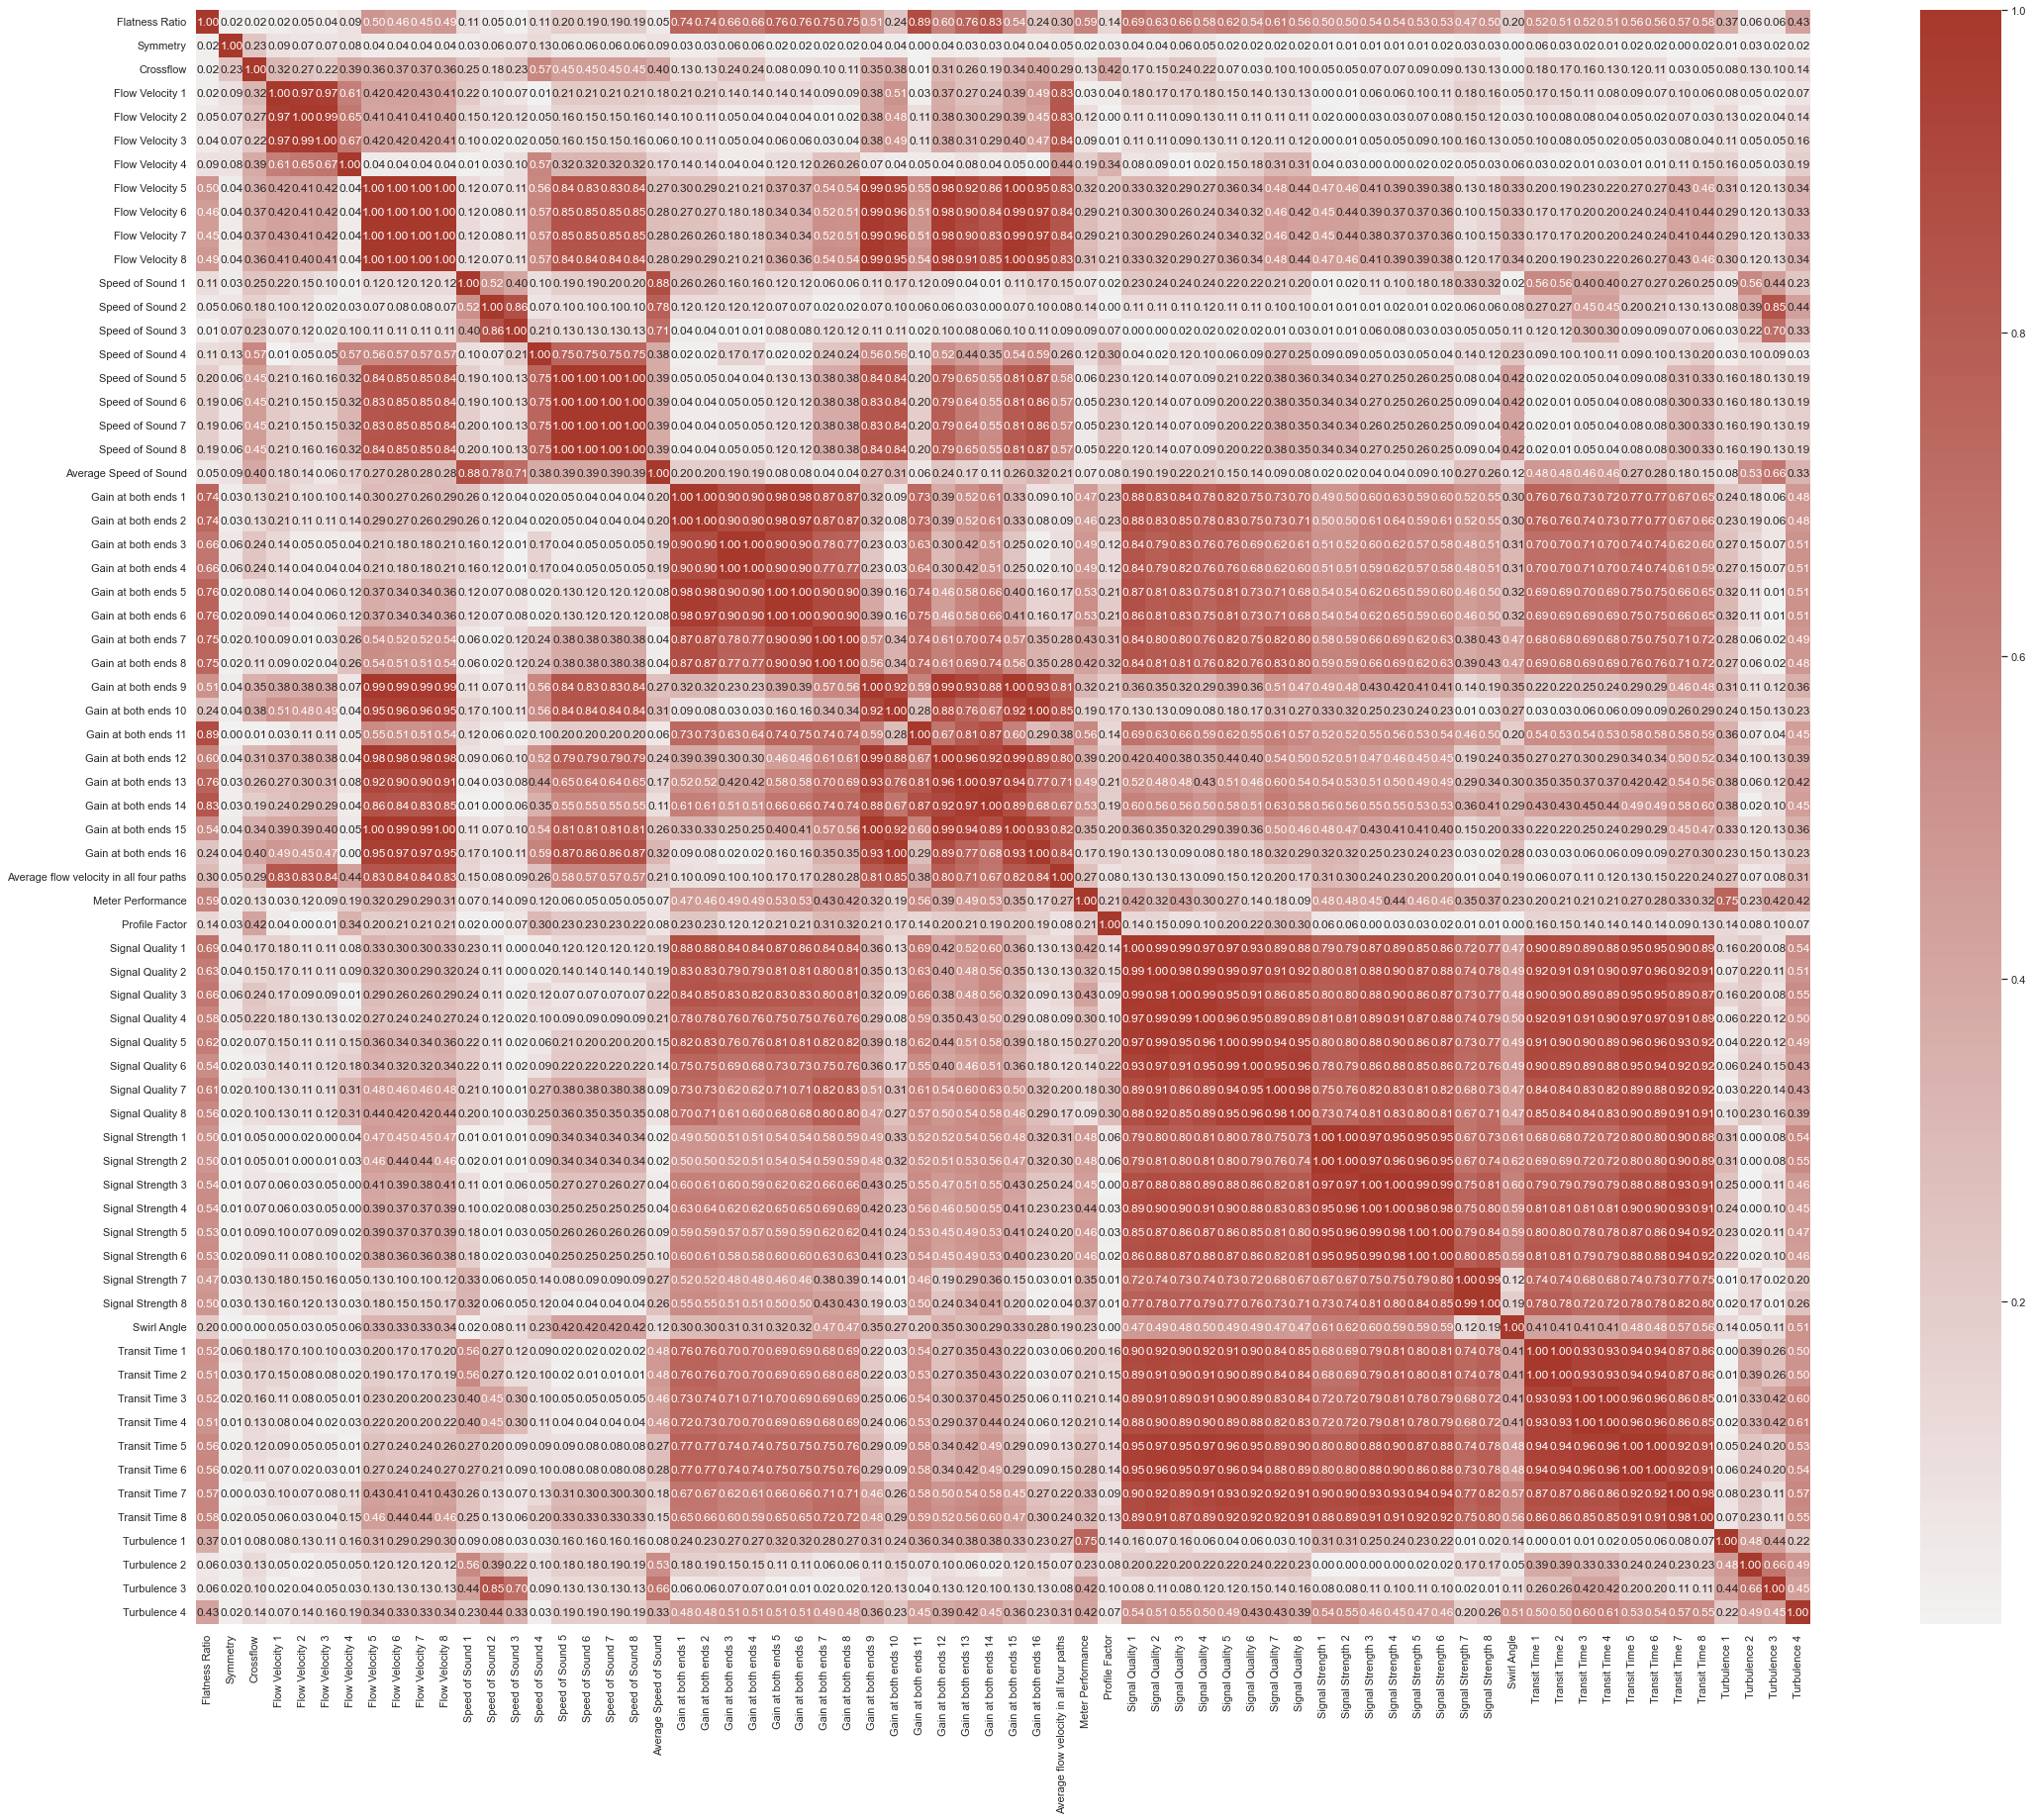

In [65]:
import seaborn as sns

# Get absolute correlation matrix
full_corr_matrix_x = full_df_x_replaced.corr().abs()

plt.figure(figsize=(40,30))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

_ = sns.heatmap(full_corr_matrix_x, center=0, annot=True, 
                fmt='.2f', square=True, cmap=cmap)


See that the two halves are identical. \
To get a more focused and better view of the matrix, we take only the first half, as both halfs are symmetrical. \
Using the mask method, the other half is filled with NaN values, and prevents unecessary computation as these sides are duplicates

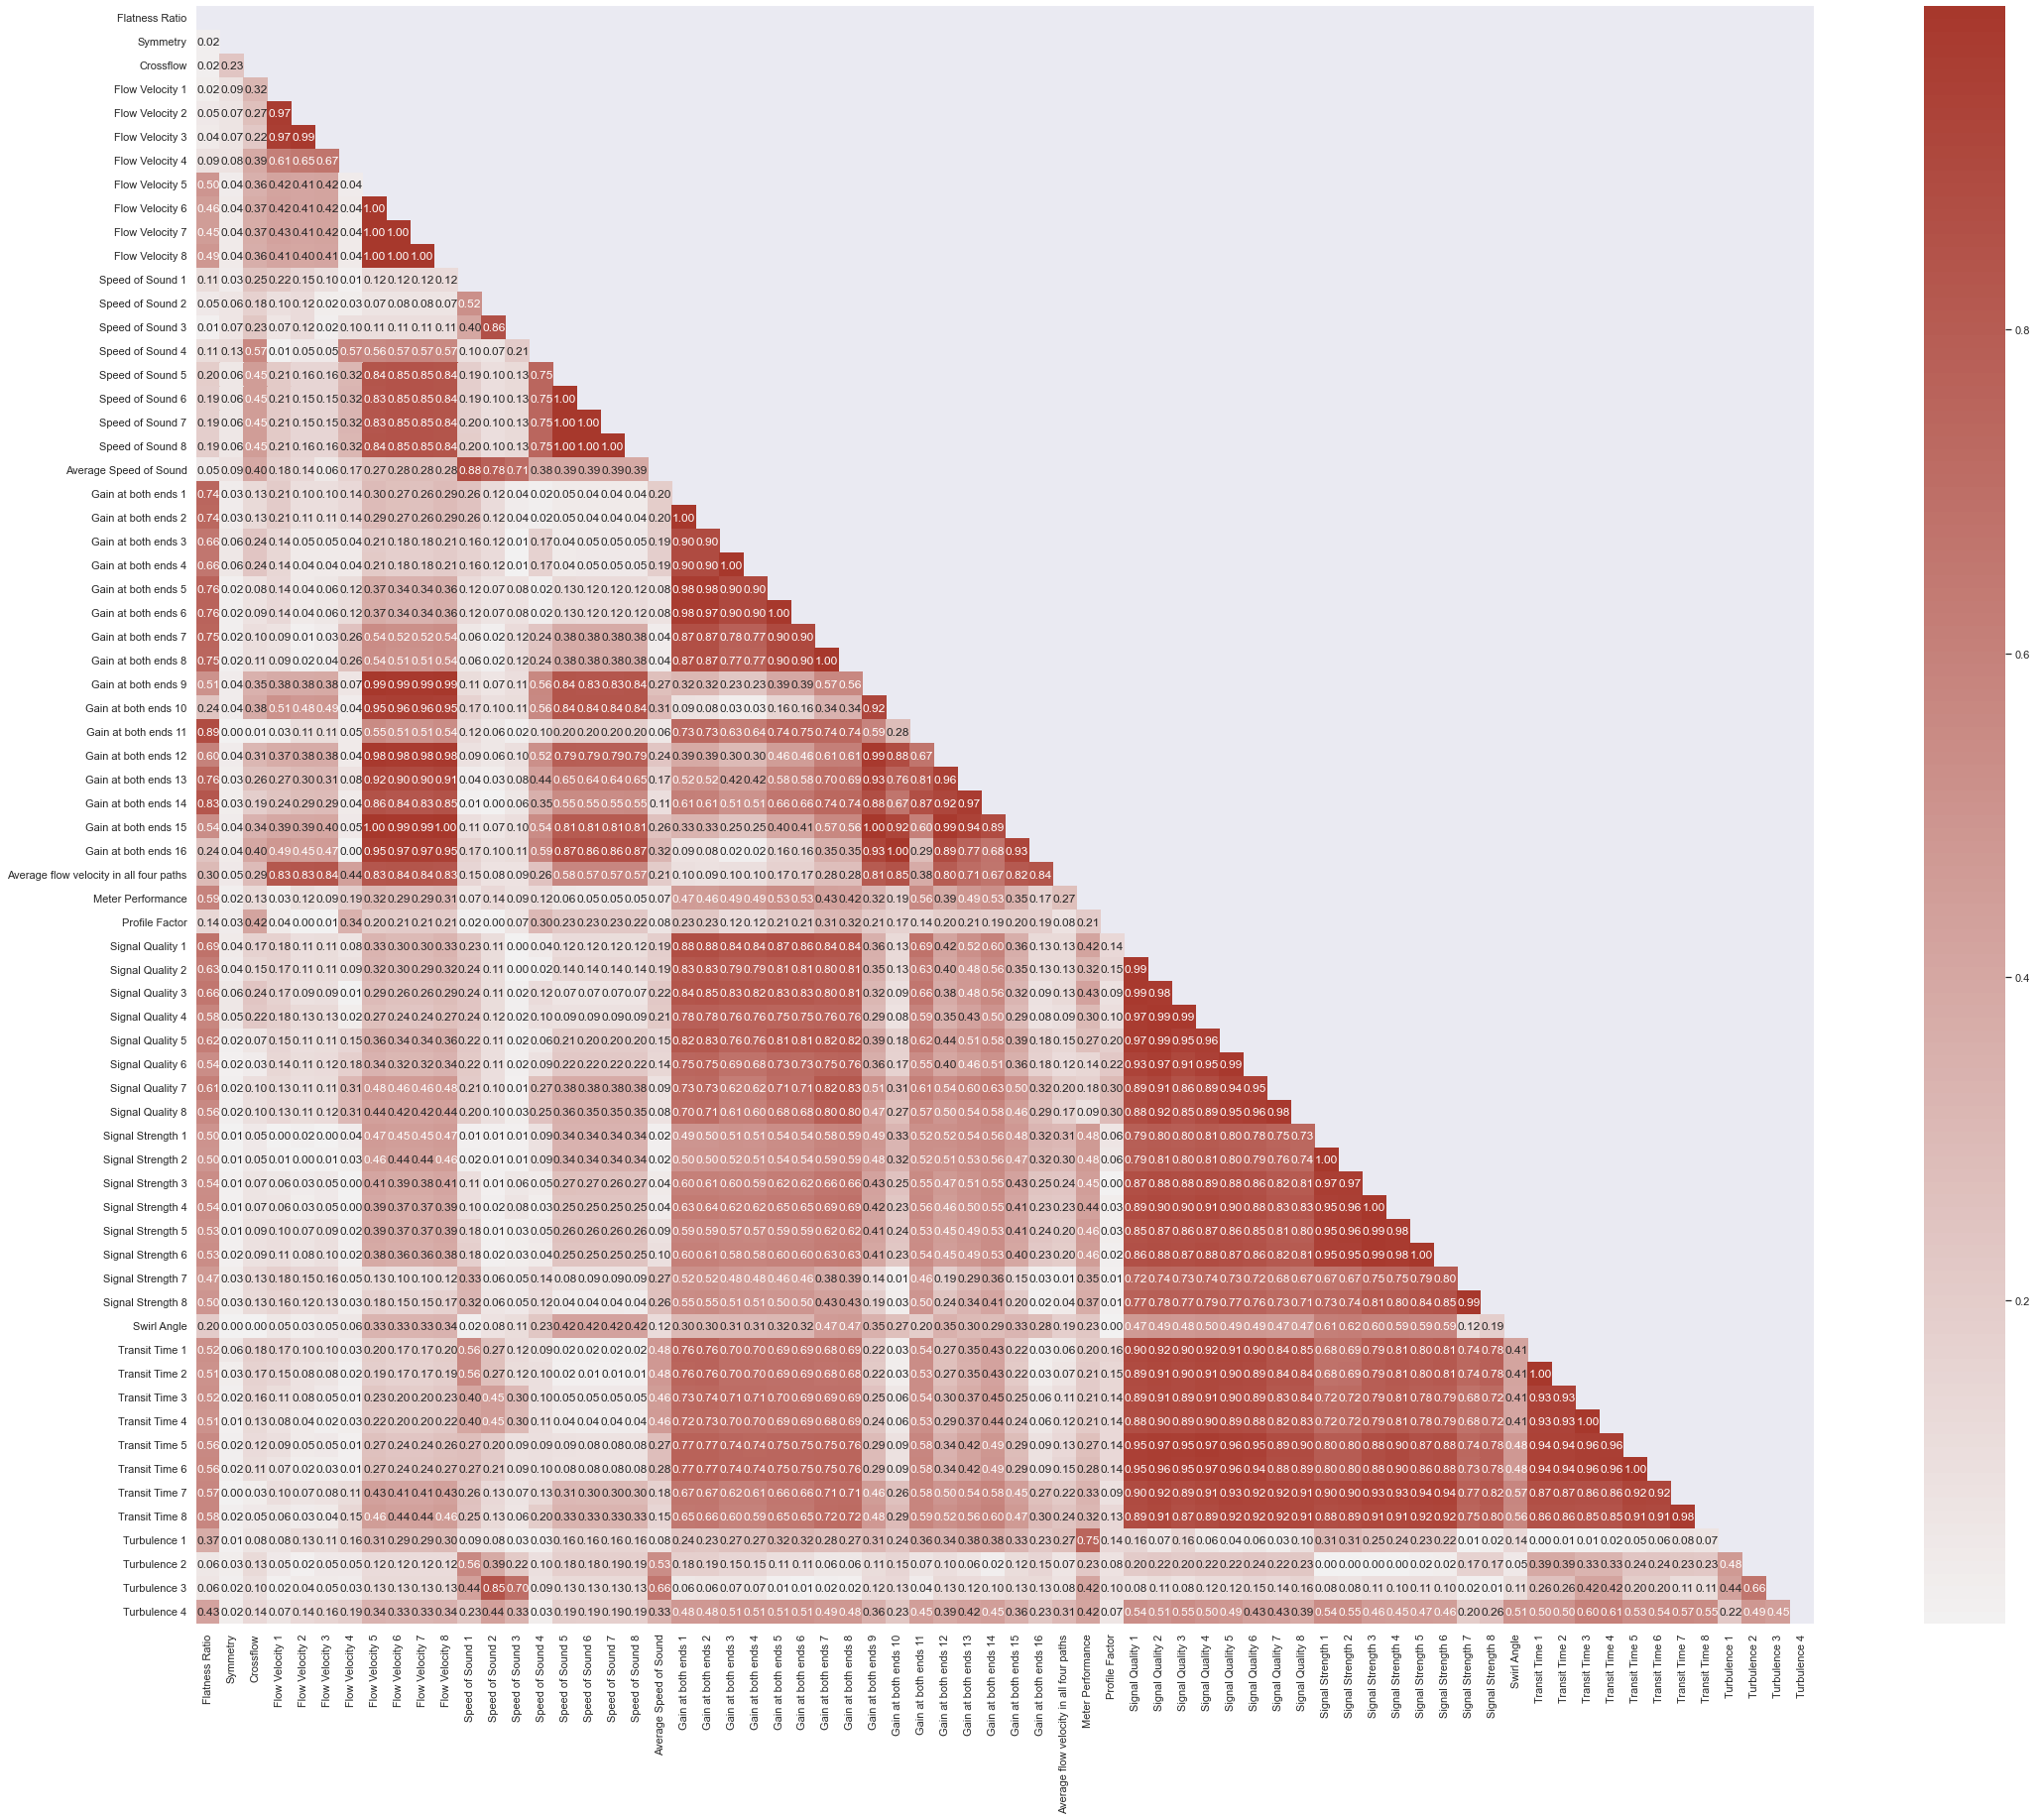

In [66]:
plt.figure(figsize=(40,30))

# Create a mask
mask = np.triu(np.ones_like(full_corr_matrix_x, dtype=bool))

sns.heatmap(full_corr_matrix_x, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)

reduced_full_corr_matrix_x = full_corr_matrix_x.mask(mask)

Set a threshold to drop the columns that has strong correlations, and get the list of columns to be dropped

In [67]:
to_drop = [c for c in reduced_full_corr_matrix_x.columns if any(reduced_full_corr_matrix_x[c] > 0.90)]
print(len(to_drop), 'rows to be dropped')

42 rows to be dropped


Drop the selected columns, resulting a dataset with redundant features eliminated

In [68]:
full_df_reduced_x = full_df_x_replaced.drop(to_drop, axis=1)
full_df_reduced_x

,Flatness Ratio,Symmetry,Crossflow,Flow Velocity 3,Flow Velocity 4,Speed of Sound 1,Speed of Sound 2,Speed of Sound 3,Speed of Sound 4,Speed of Sound 8,...,Average flow velocity in all four paths,Meter Performance,Profile Factor,Signal Strength 8,Swirl Angle,Transit Time 8,Turbulence 1,Turbulence 2,Turbulence 3,Turbulence 4
0,0.841499,1.009367,0.993816,10.037759,8.501365,1485.528500,1485.454000,1485.437500,1485.354167,1485.508667,...,9.350917,100.000000,1.096966,66.722222,0.041667,123.963333,11.830806,5.142611,5.030472,12.831889
1,0.842250,1.006584,0.996605,8.951618,7.612213,1486.042333,1485.992833,1485.973333,1485.867833,1486.033667,...,8.323063,100.000000,1.096966,66.722222,0.041667,123.963333,11.830806,5.142611,5.030472,12.831889
2,0.840723,1.011647,0.998152,7.857692,6.593117,1486.023667,1485.980833,1485.960000,1485.850500,1486.012333,...,7.273721,100.000000,1.096966,66.722222,0.041667,123.963333,11.830806,5.142611,5.030472,12.831889
3,0.841119,1.017807,0.996812,6.689885,5.615428,1484.898000,1484.872000,1484.852333,1484.739000,1484.900333,...,6.214215,100.000000,1.096966,66.722222,0.111100,123.963333,11.582833,4.994306,4.871361,12.114583
4,0.840358,1.016534,0.996221,6.675628,5.623977,1484.361333,1484.331833,1484.313833,1484.205000,1484.364000,...,6.209143,100.000000,1.096966,66.722222,0.111100,123.963333,11.582833,4.994306,4.871361,12.114583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,0.819070,5.153846,0.123245,-0.102778,-0.254722,1513.505556,1507.080556,1494.355556,1567.686111,1487.715250,...,3.847854,63.416667,4.593220,55.000000,0.209683,117.880278,28.922333,6.204250,6.451889,6.485695
355,0.819070,0.214250,0.098034,-0.103889,-2.706944,1521.897222,1474.400000,1500.705556,1555.538889,1487.715250,...,3.696222,63.416667,0.173768,55.000000,0.209683,118.631111,28.922333,6.204250,6.451889,6.485695
356,0.819070,0.115593,0.134579,-0.098889,-2.772778,1518.072222,1439.802778,1512.719444,1554.647222,1487.715250,...,3.722403,63.416667,0.049027,55.000000,0.209683,118.807500,28.922333,6.204250,6.451889,6.485695
357,0.812122,0.099441,0.143832,0.029444,-2.613333,1487.083333,1422.211111,1484.836111,1552.894444,1484.557667,...,0.668806,63.416667,-0.053056,55.000000,0.209683,118.872778,28.922333,6.204250,6.451889,6.485695


Examine the ranking of features once again

### Scale the dataset
With the scale of data varying between features, we can normalize the dataset to make the data appear similar across all records and features

In [69]:
from sklearn.preprocessing import StandardScaler
# Apply standardisation to data
full_df_reduced_x_scaled = StandardScaler().fit_transform(full_df_reduced_x)
print('Minimum and Maximum before scaling:', full_df_reduced_x.min().min(), full_df_reduced_x.max().max())
print('Minimum and Maximum after scaling:', full_df_reduced_x_scaled.min().min(), full_df_reduced_x_scaled.max().max())
print('Mean and Standard Deviation after scaling:', round(full_df_reduced_x_scaled.mean()), full_df_reduced_x_scaled.std())

Minimum and Maximum before scaling: -37.780487804878 5251.516667
Minimum and Maximum after scaling: -17.226159220003428 12.707852037415108
Mean and Standard Deviation after scaling: 0 1.0


### Examine and rank Feature Importance

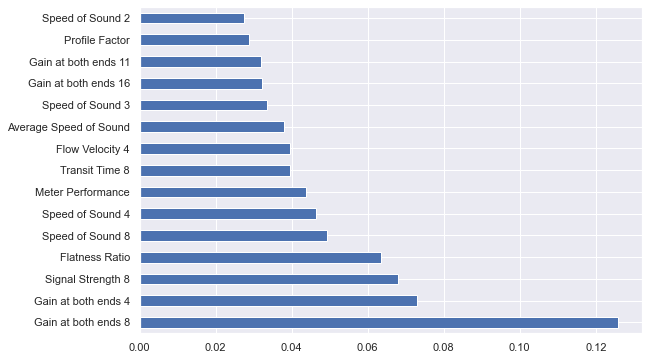

,Gain at both ends 8,Gain at both ends 4,Signal Strength 8,Flatness Ratio,Speed of Sound 8,Speed of Sound 4,Meter Performance,Transit Time 8,Flow Velocity 4,Average Speed of Sound
0,32.451173,37.130537,66.722222,0.841499,1485.508667,1485.354167,100.000000,123.963333,8.501365,1485.391229
1,32.428385,37.080077,66.722222,0.842250,1486.033667,1485.867833,100.000000,123.963333,7.612213,1485.919896
2,32.428385,37.005207,66.722222,0.840723,1486.012333,1485.850500,100.000000,123.963333,6.593117,1485.903146
3,32.485350,36.936850,66.722222,0.841119,1484.900333,1484.739000,100.000000,123.963333,5.615428,1484.790937
4,32.503255,36.949872,66.722222,0.840358,1484.364000,1484.205000,100.000000,123.963333,5.623977,1484.252875
...,...,...,...,...,...,...,...,...,...,...
354,44.600000,44.200000,55.000000,0.819070,1487.715250,1567.686111,63.416667,117.880278,-0.254722,1504.110181
355,44.600000,44.200000,55.000000,0.819070,1487.715250,1555.538889,63.416667,118.631111,-2.706944,1500.349417
356,44.169444,44.200000,55.000000,0.819070,1487.715250,1554.647222,63.416667,118.807500,-2.772778,1496.936917
357,44.100000,44.200000,55.000000,0.812122,1484.557667,1552.894444,63.416667,118.872778,-2.613333,1485.577531


In [70]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(full_df_reduced_x_scaled, np.reshape(full_df_y.to_numpy(), -1))
extraTrees_df = pd.DataFrame(full_df_reduced_x_scaled, columns=full_df_reduced_x.columns)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=extraTrees_df.columns)
feat_importances.nlargest(15).plot(kind='barh')
extraTrees_df = full_df_x_replaced[feat_importances.nlargest(10).index]
plt.show()
extraTrees_df

# Principal Component Analysis

In [71]:
full_x = full_df_reduced_x_scaled
full_y = full_df_y.to_numpy()
full_y = np.reshape(full_y, -1)
print(full_x.shape)
print(full_y.shape)

(359, 26)
(359,)


[2.58034691e-01 1.96747314e-01 1.19352721e-01 1.04106837e-01
 5.60712873e-02 5.24890600e-02 4.05858709e-02 3.69597090e-02
 2.84635255e-02 2.66167012e-02 2.10440447e-02 1.28430970e-02
 1.24701094e-02 8.06431329e-03 6.00900554e-03 4.27410793e-03
 3.79356722e-03 3.39613777e-03 2.77226954e-03 2.22239523e-03
 1.83062615e-03 7.60908674e-04 5.72287493e-04 4.57708186e-04
 6.17054511e-05 1.94892363e-10]
26
Captured eigen varience energy for PC1 to PC7: 0.8273877805072866


Text(0, 0.5, 'cumulative explained variance')

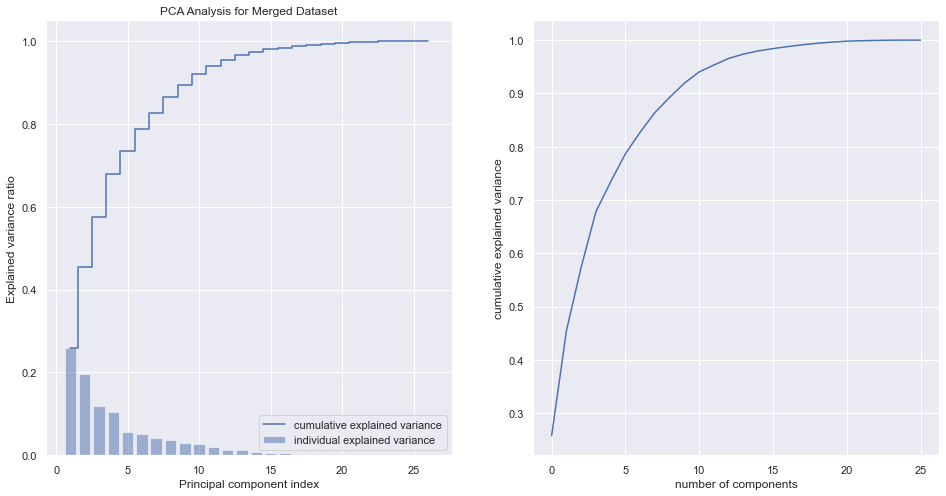

In [72]:
from sklearn.decomposition import PCA

pca_all = PCA()
pca_all.fit(full_x)
tot = sum(pca_all.explained_variance_)
# var_exp = [(i / tot) for i in sorted(pca_all.explained_variance_, reverse=True)]
var_exp = pca_all.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(var_exp)
print(len(var_exp))
print('Captured eigen varience energy for PC1 to PC7:', sum(var_exp[:7]))
# plot explained variances
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
ax1.bar(range(1, full_x.shape[1]+1), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
ax1.step(range(1,full_x.shape[1]+1), cum_var_exp, where='mid',
         label='cumulative explained variance')
ax1.set_ylabel('Explained variance ratio')
ax1.set_xlabel('Principal component index')
ax1.set_title('PCA Analysis for Merged Dataset')
ax1.legend(loc='best')
ax2.plot(np.cumsum(pca_all.explained_variance_ratio_))
ax2.set_xlabel('number of components')
ax2.set_ylabel('cumulative explained variance')

From the above graphs, we see that PC1 to PC7 captures 82.7% of the variation of data, which is sufficient for representation. Therefore, 7 PCS are sufficient.

In [73]:
pca = PCA(n_components=7)
pca.fit(full_x)
full_x_pca=pca.transform(full_x)
print(full_x_pca.shape) # 7 PC used

(359, 7)


# Data Mining

Create the train-test split of the data, with 80% training and 20% testing data

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(full_x_pca, full_y, test_size=0.2, random_state=12)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

# Store accuracy in a dictionary for later analysis
accuracy_store = {}

(287, 7) (287,)
(72, 7) (72,)


### Analysing the Dataset

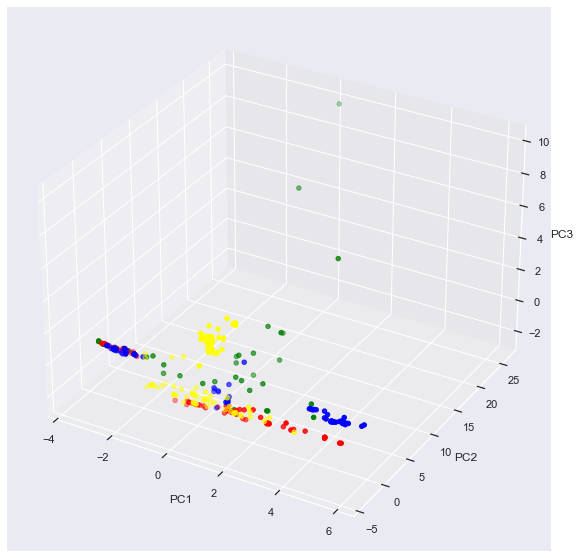

In [75]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

sns.set(style = "darkgrid")

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection = '3d')

reds = full_y == 1           
greens = full_y == 2
blues = full_y == 3
yellows = full_y == 4
sns.set(style = "darkgrid")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.scatter(xs=full_x_pca[reds, 0], ys=full_x_pca[reds, 1], zs=full_x_pca[reds, 2], c='red')
ax.scatter(xs=full_x_pca[greens, 0], ys=full_x_pca[greens, 1], zs=full_x_pca[greens, 2], c='green')
ax.scatter(xs=full_x_pca[blues, 0], ys=full_x_pca[blues, 1], zs=full_x_pca[blues, 2], c='blue')
ax.scatter(xs=full_x_pca[yellows, 0], ys=full_x_pca[yellows, 1], zs=full_x_pca[yellows, 2], c='yellow')


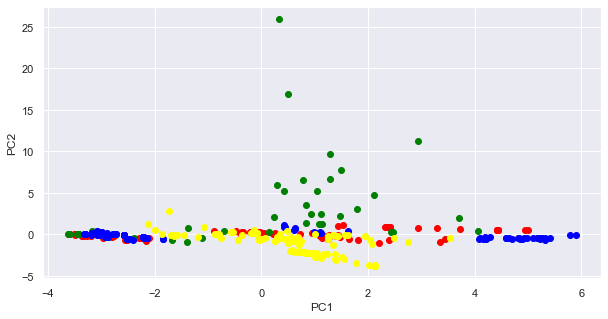

In [76]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
sns.set(style = "darkgrid")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.scatter(x=full_x_pca[reds, 0], y=full_x_pca[reds, 1], c='red')
ax.scatter(x=full_x_pca[greens, 0], y=full_x_pca[greens, 1],  c='green')
ax.scatter(x=full_x_pca[blues, 0], y=full_x_pca[blues, 1], c='blue')
ax.scatter(x=full_x_pca[yellows, 0], y=full_x_pca[yellows, 1], c='yellow')

### Multi-variate Linear Regression

In [77]:
from sklearn import linear_model
# Create linear regression object
regr = linear_model.LinearRegression()

# Fit regression model to the training set
regr.fit(X_train, Y_train)
Y_pred_test = regr.predict(X_test)


Visualize and evaluate the Linear Regression Model

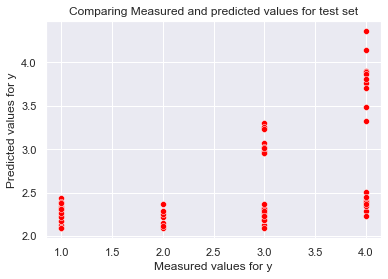

Root mean squared error = 0.9544
R-squared = 0.2621


In [78]:
from sklearn.metrics import mean_squared_error, r2_score
sns.scatterplot(x=Y_test, y=Y_pred_test, color='red')
plt.title('Comparing Measured and predicted values for test set')
plt.xlabel('Measured values for y')
plt.ylabel('Predicted values for y')
plt.show()

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, Y_pred_test)))
print('R-squared = %.4f' % r2_score(Y_test, Y_pred_test))

Slope =  0.08748534118136399
Intercept =  2.5496398779033362


Text(0, 0.5, 'Y')

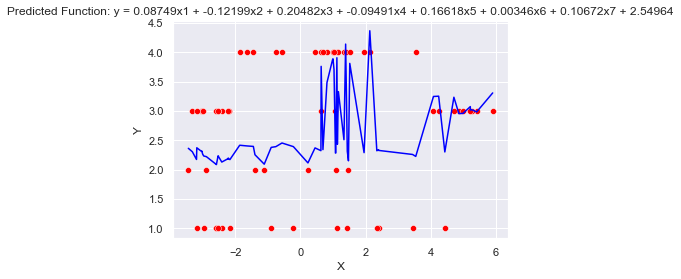

In [79]:
print('Slope = ', regr.coef_[0])   #get the gradient/regression
print('Intercept = ', regr.intercept_)### Step 4: Postprocessing
sns.scatterplot(x=X_test[:,0], y=Y_test,  color='red')
sns.lineplot(x=X_test[:,0], y=Y_pred_test, color='blue')
titlestr = 'Predicted Function: y = %.5fx1 + %.5fx2 + %.5fx3 + %.5fx4 + %.5fx5 + %.5fx6 + %.5fx7 + %.5f' % (regr.coef_[0], regr.coef_[1], regr.coef_[2], regr.coef_[3], regr.coef_[4], regr.coef_[5], regr.coef_[6], regr.intercept_)
plt.title(titlestr)
plt.xlabel('X')
plt.ylabel('Y')

We see that Linear Regression is not that of a good regressor for our dataset, as the plotted line does not really predict that well

### Decision Tree Classifier

Max Depth = 9 Training Accuracy: 0.9477351916376306 
Max Depth = 9 Testing Accuracy: 0.7361111111111112


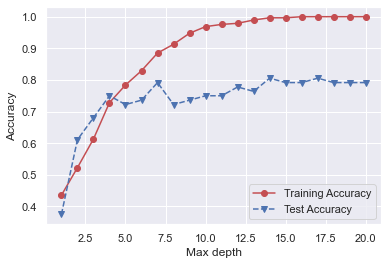

In [80]:
from sklearn import tree
from sklearn.metrics import accuracy_score

maxdepths = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

trainAccuracy = np.zeros(len(maxdepths))
testAccuracy = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAccuracy[index] = accuracy_score(Y_train, Y_predTrain)
    testAccuracy[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
print('Max Depth = 9 Training Accuracy:', trainAccuracy[8], '\nMax Depth = 9 Testing Accuracy:', testAccuracy[8])   
# Plot training and testing accuracies
plt.plot(maxdepths,trainAccuracy,'ro-',maxdepths,testAccuracy,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

accuracy_store['Decision Tree Classifier'] = testAccuracy[8]

We see that the knee point for our test accuracy is at Max Depth = 9. Therefore, we take 9 as the optimal max depth for the decision tree classifier

### K Nearest Neighbours

K=13 Training accuracy: 0.759581881533101 
K=13 Testing Accuracy 0.7083333333333334


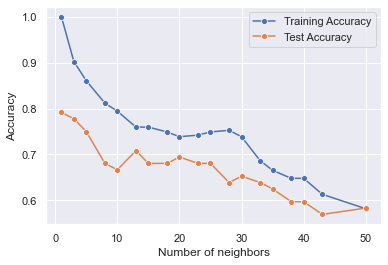

In [81]:
from sklearn.neighbors import KNeighborsClassifier

numNeighbors = [1,3,5,8,10,13,15,18,20,23,25,28,30,33,35,38,40,43,35,38,50]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(Y_train, Y_predTrain))
    testAcc.append(accuracy_score(Y_test, Y_predTest))

sns.lineplot(x=numNeighbors, y=trainAcc, marker='o')
sns.lineplot(x=numNeighbors, y=testAcc, marker='o')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
print('K=13 Training accuracy:', trainAcc[5], '\nK=13 Testing Accuracy', testAcc[5])

accuracy_store['KNN'] = testAccuracy[5]

We see that the knee point for the above graph is K=13. Therefore, let the optimal K value for K Nearest Neighbours be 13.

### Naive Bayes

Training Accuracy: 0.6167247386759582
Testing Accuracy: 0.5833333333333334


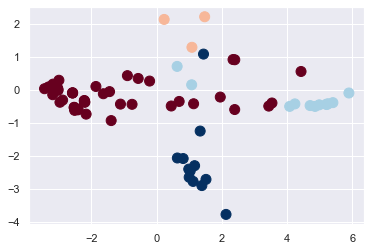

In [82]:
from sklearn.naive_bayes import GaussianNB

nb_model=GaussianNB()
nb_model.fit(X_train, Y_train)
Y_predTrain = nb_model.predict(X_train)
Y_predTest = nb_model.predict(X_test)
trainAcc=accuracy_score(Y_train, Y_predTrain)
testAcc=accuracy_score(Y_test, Y_predTest)
print("Training Accuracy:",trainAcc)
print("Testing Accuracy:",testAcc)

plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_predTest, s=100, cmap='RdBu')

accuracy_store['Naive Bayes'] = testAcc

### Logistic Regression

C=1.5 Training Accuracy: 0.6933797909407665 
C=1.5 Testing Accuracy: 0.7638888888888888


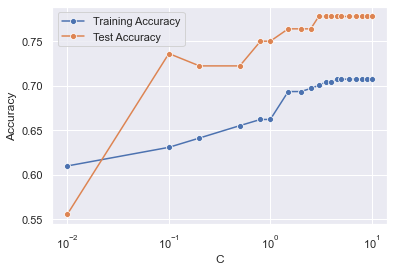

In [83]:
from sklearn.linear_model import LogisticRegression

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 6, 7, 8, 9, 10]

LRtrainAcc = []
LRtestAcc = []

for param in C:
    lr_model = LogisticRegression(C=param, solver='lbfgs')
    lr_model.fit(X_train, Y_train)
    Y_predTrain = lr_model.predict(X_train)
    Y_predTest = lr_model.predict(X_test)
    LRtrainAcc.append(accuracy_score(Y_train, Y_predTrain))
    LRtestAcc.append(accuracy_score(Y_test, Y_predTest))
sns.lineplot(x=C, y=LRtrainAcc, marker="o")
sns.lineplot(x=C, y=LRtestAcc, marker="o")
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')
print('C=1.5 Training Accuracy:', LRtrainAcc[6], '\nC=1.5 Testing Accuracy:', LRtestAcc[6])

accuracy_store['Logistic Regression'] = LRtestAcc[6]

We see that the knee point for Logistic Regression is at a inverse regularization strength of 1.5. Therefore, let the optimal parameters be C=1.5

### Support Vector Machine

C=3 Training Accuracy: 0.8048780487804879 
C=3 Testing Accuracy: 0.7777777777777778


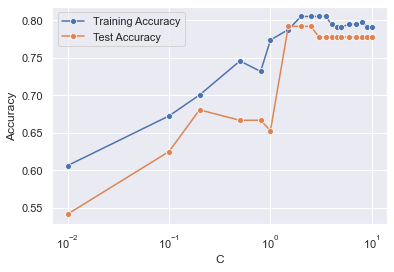

In [84]:
from sklearn.svm import SVC

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 6, 7, 8, 9, 10]
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    svm_model = SVC(C=param,kernel='linear')
    svm_model.fit(X_train, Y_train)
    Y_predTrain = svm_model.predict(X_train)
    Y_predTest = svm_model.predict(X_test)
    SVMtrainAcc.append(accuracy_score(Y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(Y_test, Y_predTest))

sns.lineplot(x=C, y=SVMtrainAcc, marker="o")
sns.lineplot(x=C, y=SVMtestAcc, marker="o")
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')
print('C=3 Training Accuracy:', SVMtrainAcc[9], '\nC=3 Testing Accuracy:', SVMtestAcc[9])

accuracy_store['SVM'] = SVMtestAcc[9]


We see that the knee point for SVM is at a inverse regularization strength of 3. Therefore, let the optimal parameters be C=3

### Non-linear Support Vector Machine

C=7 Training Accuracy: 0.8536585365853658 
C=7 Testing Accuracy: 0.7361111111111112


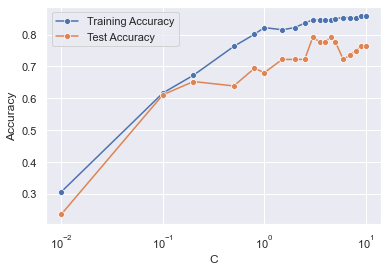

In [85]:

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 6, 7, 8, 9, 10]
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    nonlinear_svm_model = SVC(C=param,kernel='rbf',gamma='auto')
    nonlinear_svm_model.fit(X_train, Y_train)
    Y_predTrain = nonlinear_svm_model.predict(X_train)
    Y_predTest = nonlinear_svm_model.predict(X_test)
    SVMtrainAcc.append(accuracy_score(Y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(Y_test, Y_predTest))

sns.lineplot(x=C, y=SVMtrainAcc, marker="o")
sns.lineplot(x=C, y=SVMtestAcc, marker="o")
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')
print('C=7 Training Accuracy:', SVMtrainAcc[15], '\nC=7 Testing Accuracy:', SVMtestAcc[15])

accuracy_store['NLSVM'] = SVMtestAcc[15]


We see that the training and test accuracy starts to converge at a regularization parameter of 15. Therefore, we take the 15 as the optimal regularization parameter

### Neural Network

(40,40,40) Training Accuracy: 0.9128919860627178 
(40,40,40) Testing Accuracy: 0.8333333333333334


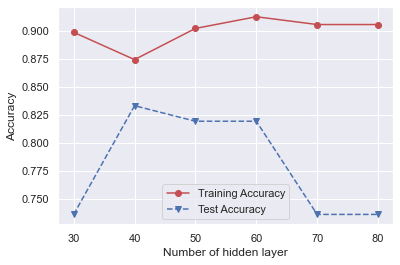

In [86]:
from sklearn.neural_network import MLPClassifier

hidden_layer_sizes = [(30,30,30), (40,40,40), (50,50,50), (60,60,60), (70,70,70), (80,80,80)]
trainAcc = []
testAcc = []

for k in hidden_layer_sizes:
    nn_model = MLPClassifier(solver='adam',hidden_layer_sizes=k, learning_rate='adaptive',random_state=12,max_iter=1000)
    nn_model.fit(X_train, Y_train)
    Y_predTrain = nn_model.predict(X_train)
    Y_predTest = nn_model.predict(X_test)
    trainAcc.append(accuracy_score(Y_train, Y_predTrain))
    testAcc.append(accuracy_score(Y_test, Y_predTest))
hidden_layer_size=[x[0] for x in hidden_layer_sizes]
plt.plot(hidden_layer_size, trainAcc, 'ro-', hidden_layer_size, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of hidden layer')
plt.ylabel('Accuracy')
print('(40,40,40) Training Accuracy:', trainAcc[3], '\n(40,40,40) Testing Accuracy:', testAcc[1])

accuracy_store['Neural Network'] = testAcc[1]

We see that the knee point where the model performs well both in training and testing accuracy is having (40, 40, 40) hidden layers. Therefore, we take (40, 40, 40) as the optimal hidden layer sizes as increasing the sizes does not give any significant improvements.

### Anomaly Detection Using Statistical Approach

In [87]:
import numpy as np

df_full_x_pca = pd.DataFrame(full_x_pca)

N,d = df_full_x_pca.shape
delta = pd.DataFrame(100*np.divide(df_full_x_pca.iloc[1:,:].values-df_full_x_pca.iloc[:N-1,:].values, df_full_x_pca.iloc[:N-1,:].values),
                    columns=df_full_x_pca.columns, index=df_full_x_pca.iloc[1:].index)
delta

,0,1,2,3,4,5,6
1,-30.382067,20.782617,-16.490977,-17.639686,-232.012850,-37.928298,-19.691075
2,-31.440127,-6.326069,-5.908660,-23.141319,146.338257,-33.539963,-28.013623
3,-21.829306,-65.775466,38.936319,-39.100392,24.959993,24.542097,-55.279416
4,-1.718758,-51.557064,7.468308,-0.219021,-10.275112,11.442679,-21.631644
5,-14.447337,23.907870,-1.854880,0.933321,0.379710,-10.935106,-14.859849
...,...,...,...,...,...,...,...
354,-230.089101,-466.013697,193.425444,-16.199277,-53.414643,-11.356652,-116.076675
355,-63.899800,-36.697141,-58.666301,-11.510360,268.938716,-260.996369,57.512682
356,-0.046497,-7.678478,2.595366,-0.267017,-0.285455,1.330841,-3.789529
357,-944.540156,-266.660476,-150.041737,52.971139,0.943448,-30.143113,-49.804317


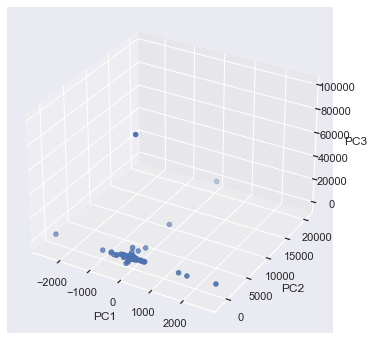

In [88]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams["figure.figsize"] = (9,6) # The default value of the figsize parameter is [6.4, 4.8]

fig = plt.figure(figsize=(9,6)).gca(projection='3d')
fig.scatter(delta.iloc[:, 0],delta.iloc[:, 1],delta.iloc[:, 2])
fig.set_xlabel('PC1')
fig.set_ylabel('PC2')
fig.set_zlabel('PC3')
_ = plt.show()

In [89]:
meanValue = delta.mean()
covValue = delta.cov()
print('meanValue', '\n', meanValue)
print('covValue',  '\n', covValue)

meanValue 
 0     -8.338687
1     78.943783
2    285.492315
3     41.854792
4    -23.175025
5    -10.262143
6    245.091417
dtype: float64
covValue 
               0             1             2              3              4  \
0  64836.762970  3.261301e+03  1.316175e+03    5054.469724   -2156.858858   
1   3261.301489  1.431042e+06  2.499263e+05    1852.391554    4850.925689   
2   1316.175081  2.499263e+05  2.736049e+07  -43262.244715   43884.729600   
3   5054.469724  1.852392e+03 -4.326224e+04  539857.277947    2600.194915   
4  -2156.858858  4.850926e+03  4.388473e+04    2600.194915  157077.984888   
5  -3802.206012 -5.399491e+03  7.019085e+03    2256.789341   -3190.593182   
6 -48975.286133 -5.746354e+04 -6.741196e+04  -74723.086989  -98305.426018   

               5             6  
0   -3802.206012 -4.897529e+04  
1   -5399.491170 -5.746354e+04  
2    7019.085132 -6.741196e+04  
3    2256.789341 -7.472309e+04  
4   -3190.593182 -9.830543e+04  
5  147902.637631 -5.011247e+04  
6 

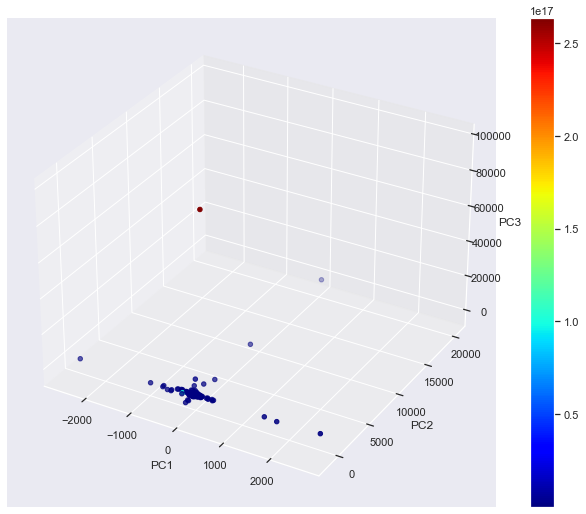

In [90]:
import scipy

X = delta.values
S = covValue.values
for i in range(7):
    X[:,i] = X[:,i] - meanValue[i]

def mahalanobis(row):
    # matmul: Matrix product of two arrays
    # dot: Dot product of two arrays
    return np.matmul(row,S).dot(row)   
    
anomaly_score = np.apply_along_axis(mahalanobis, axis=1, arr=X) # Apply a function to 1-D slices along the given axis.

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')

# We use PC3 in our visualization to help identify the outliers in a 3D space.
p = ax.scatter(delta.iloc[:, 0],delta.iloc[:, 1],delta.iloc[:, 2],c=anomaly_score,cmap='jet')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
fig.colorbar(p)
plt.show()

In [91]:
anom = pd.DataFrame(anomaly_score, index=delta.index, columns=['Anomaly score'])
result = pd.concat((delta,anom), axis=1)
result.nlargest(5,'Anomaly score') # Return the first n rows with the largest values in columns, in descending order

,0,1,2,3,4,5,6,Anomaly score
186,-0.226134,989.638418,98198.708985,-144.475197,158.201582,12.418829,-120.205186,2.638913e+17
347,-240.452213,-301.011550,-475.330031,-601.221963,-456.465827,-261.060271,77314.062644,1.019905e+17
147,9.716289,-83.042267,8606.810682,-143.190890,-27.003788,7.995926,-213.383936,2.027557e+15
273,8.679193,20349.333992,-292.392542,-42.845478,-3.433708,8.856483,-180.139654,5.929149e+14
156,11.866560,-70.014332,-213.208498,2944.602017,-14.110056,35.268293,5230.653320,4.705537e+14


Text(0, 0.5, 'Percent Change')

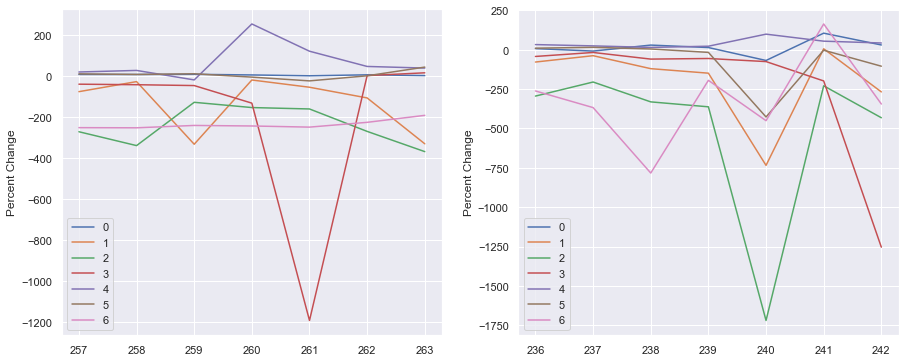

In [92]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

ts1 = delta[256:263]
_ = ts1.plot.line(ax=ax1)
ax1.set_ylabel('Percent Change')

ts2 = delta[235:242]
_ = ts2.plot.line(ax=ax2)
ax2.set_ylabel('Percent Change')

### Anomaly Detection Using KNN

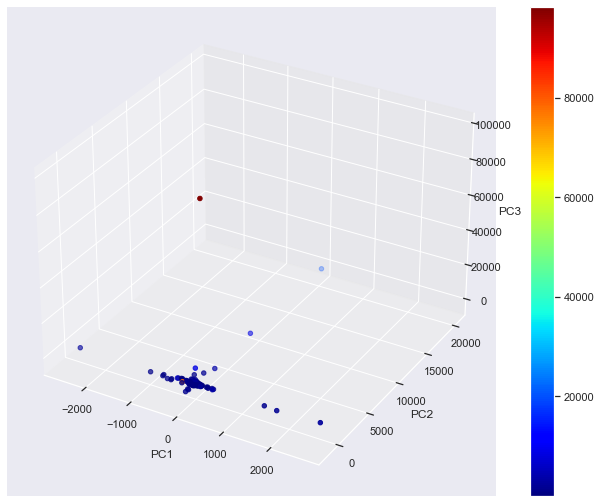

In [110]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance

knn = 13
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(delta.values)
distances, indices = nbrs.kneighbors(delta.values)

anomaly_score = distances[:,knn-1]

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(delta.iloc[:, 0],delta.iloc[:, 1],delta.iloc[:, 2],c=anomaly_score,cmap='jet')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
fig.colorbar(p)
plt.show()

In [111]:
anom = pd.DataFrame(anomaly_score, index=delta.index, columns=['Anomaly score'])
result = pd.concat((delta,anom), axis=1)
result.nlargest(5,'Anomaly score')

,0,1,2,3,4,5,6,Anomaly score
186,-0.226134,989.638418,98198.708985,-144.475197,158.201582,12.418829,-120.205186,98312.127361
347,-240.452213,-301.011550,-475.330031,-601.221963,-456.465827,-261.060271,77314.062644,77201.097990
273,8.679193,20349.333992,-292.392542,-42.845478,-3.433708,8.856483,-180.139654,20253.071599
320,5.561369,-83.944841,-294.213976,9640.513334,24.915720,-17.665867,-271.887043,9317.850039
147,9.716289,-83.042267,8606.810682,-143.190890,-27.003788,7.995926,-213.383936,8751.342940


Text(0, 0.5, 'Percent Change')

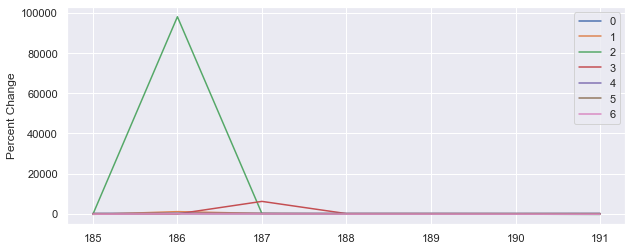

In [115]:
fig = plt.figure(figsize=(10,4))

ax = fig.add_subplot(111)
ts = delta[184:191]
ts.plot.line(ax=ax)
ax.set_ylabel('Percent Change')

### Visualisation of Decision Boundary on various classifiers
To better analyse the decision mechanisms of the applied data mining algorithms, we can plot decision boundary visualisations based on these algorithms with our found optimal parameters:
1. Multilinear Linear Regression
2. Decision Tree (Max Depth = 9)
3. K Nearest Neighbours (K=13)
4. Naive Bayes
5. Logistic Regression (C=1.5)
6. Support Vector Machine (C=3)
7. Non-linear Support Vector Machine (C=15)
8. Neural Network 40-40-40 layers

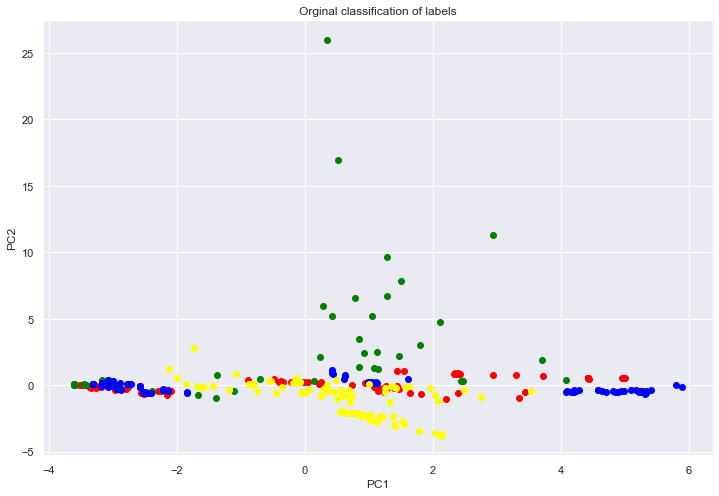

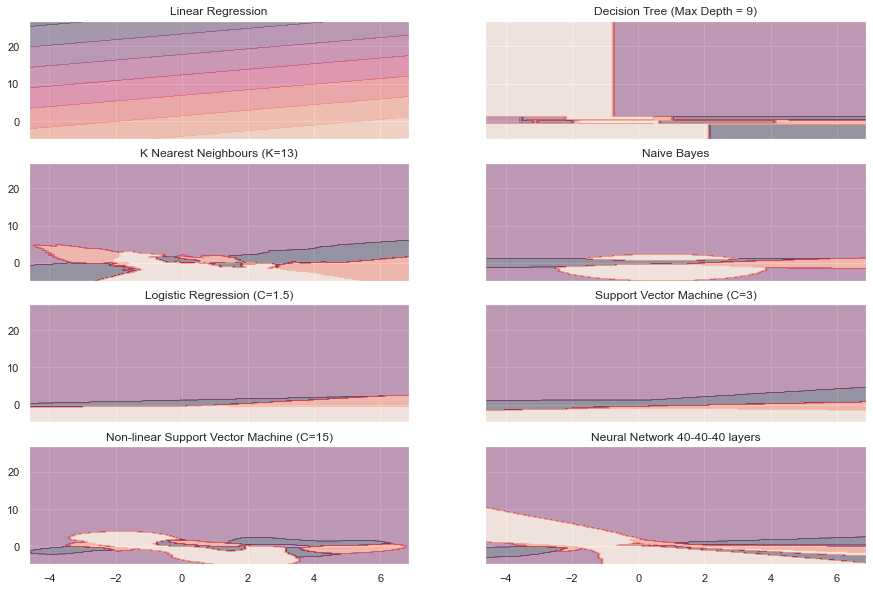

In [113]:
# Use PCA with 2 components to better visualize the decision boundary
pca = PCA(n_components=2)
pca.fit(full_x)
full_x_pca_2=pca.transform(full_x)

x_min, x_max = full_x_pca_2[:, 0].min() - 1, full_x_pca_2[:, 0].max() + 1
y_min, y_max = full_x_pca_2[:, 1].min() - 1, full_x_pca_2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(full_x_pca_2, full_y, test_size=0.2, random_state=12)


#  Optimal Multivariate Linear Regression
regr_clf = linear_model.LinearRegression()
regr_clf = regr_clf.fit(X_train_2, Y_train_2)

#  Optimal Decision Tree Classifier (Max Depth = 7)
tree_clf = tree.DecisionTreeClassifier(max_depth=9)
tree_clf = tree_clf.fit(X_train_2, Y_train_2)

# Optimal K Nearest Neighbours (K=5)
knn_clf = KNeighborsClassifier(n_neighbors=13, metric='minkowski', p=2)
knn_clf = knn_clf.fit(X_train_2, Y_train_2)

# Optimal Naive Bayes
nb_clf = GaussianNB()
nb_clf = nb_clf.fit(X_train_2, Y_train_2)

# Optimal Logistic Regression (C=1)
lr_clf = LogisticRegression(C=1.5, solver='lbfgs')
lr_clf = lr_clf.fit(X_train_2, Y_train_2)

# Optimal Support Vector Machine (C=1)
l_svm_clf = SVC(C=3, kernel='linear')
l_svm_clf = l_svm_clf.fit(X_train_2, Y_train_2)

# Non-linear Support Vector Machine (C=3)
nl_svm_clf = SVC(C=15, kernel='rbf',gamma='auto')
nl_svm_clf = nl_svm_clf.fit(X_train_2, Y_train_2)

# Neural Network (40,40,40) layers
nn_clf = MLPClassifier(solver='adam',hidden_layer_sizes=(40,40,40), learning_rate='adaptive',random_state=12,max_iter=1000)
nn_clf = nn_clf.fit(X_train_2, Y_train_2)


# Plot label positions
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
sns.set(style = "darkgrid")
ax.set_title('Orginal classification of labels')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.scatter(x=full_x_pca[reds, 0], y=full_x_pca[reds, 1], c='red')
ax.scatter(x=full_x_pca[greens, 0], y=full_x_pca[greens, 1],  c='green')
ax.scatter(x=full_x_pca[blues, 0], y=full_x_pca[blues, 1], c='blue')
ax.scatter(x=full_x_pca[yellows, 0], y=full_x_pca[yellows, 1], c='yellow')

# Plot decision boundary
f, axarr = plt.subplots(4, 2, sharex='col', sharey='row', figsize=(15, 10))

for idx, clf, tt in zip([[0, 0],[0,1],[1,0],[1,1],[2,0],[2,1],[3,0],[3,1]], [regr_clf,tree_clf,knn_clf,nb_clf,lr_clf,l_svm_clf,nl_svm_clf,nn_clf],
['Linear Regression','Decision Tree (Max Depth = 9)','K Nearest Neighbours (K=13)','Naive Bayes','Logistic Regression (C=1.5)','Support Vector Machine (C=3)',
'Non-linear Support Vector Machine (C=15)','Neural Network 40-40-40 layers']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Z = clf.predict(X_test)
    Z = Z.reshape(xx.shape)
    axarr[idx[0], idx[1]].contourf(xx, yy, Z,alpha=0.4)
    axarr[idx[0], idx[1]].set_title(tt)
plt.show()

### Accuracy Analysis

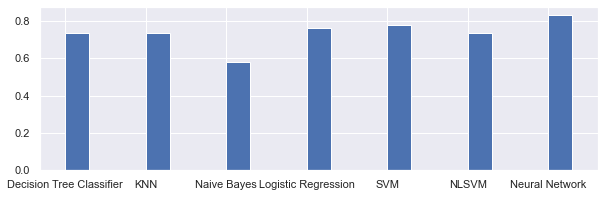

In [114]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
plt.bar(range(len(accuracy_store)), list(accuracy_store.values()), align='edge', width=0.3)
plt.xticks(range(len(accuracy_store)),list(accuracy_store.keys()))
plt.show()